In [ ]:
#import libraries needed for the analysis
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#import dataset
url = 'https://raw.githubusercontent.com/kcsaba92/my_csv_files/master/HR-Employee-Attrition.csv'
df = pd.read_csv(url)
#lower case column names to make it easier to read and manipulate data
df.columns = df.columns.str.lower()
#print info to see columns, check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   attrition                 1470 non-null   object
 2   businesstravel            1470 non-null   object
 3   dailyrate                 1470 non-null   int64 
 4   department                1470 non-null   object
 5   distancefromhome          1470 non-null   int64 
 6   education                 1470 non-null   int64 
 7   educationfield            1470 non-null   object
 8   employeecount             1470 non-null   int64 
 9   employeenumber            1470 non-null   int64 
 10  environmentsatisfaction   1470 non-null   int64 
 11  gender                    1470 non-null   object
 12  hourlyrate                1470 non-null   int64 
 13  jobinvolvement            1470 non-null   int64 
 14  joblevel                

In [ ]:
#since I am going to compare the income of women and man, I split the data into female and male
female = df[(df['gender'] == 'Female')]
print(female.shape)

male = df[(df['gender'] == 'Male')]
print(male.shape)
#I am calling shape to see how many samples each group has

(588, 35)
(882, 35)


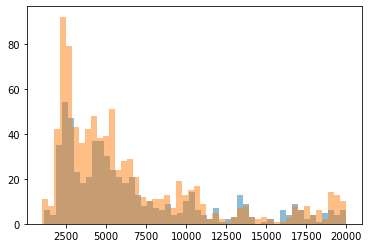

DescribeResult(nobs=588, minmax=(1129, 19973), mean=6686.566326530612, variance=22048739.251129925, skewness=1.265405982460292, kurtosis=0.6588763943837175)
DescribeResult(nobs=882, minmax=(1009, 19999), mean=6380.507936507936, variance=22229872.540799595, skewness=1.4402980490941728, kurtosis=1.2428730146891933)


In [ ]:
#we have less female samples than male, but the differnce is not too big
#draw a histograms to see the distributions for monthly income
plt.hist(female['monthlyincome'], alpha = .5, bins=50)
plt.show()
plt.hist(male['monthlyincome'], alpha = .5, bins=50)
plt.show()
#Also print stat descriptions to check skewness, and kurtosis
print(stats.describe(female['monthlyincome']))
print(stats.describe(male['monthlyincome']))

In [ ]:
'''These are obviously not normal distributions, however a positevly skewed distribution is normal for income data 
since only few people makes almost 3 times as much as the average employee'''
#Finally, I confirm non-norrmality with shapiro's test
print(stats.shapiro(female['monthlyincome']))
print(stats.shapiro(male['monthlyincome']))

(0.8416616916656494, 9.378564564919968e-24)
(0.8169718384742737, 1.709933327621381e-30)


In [ ]:
#The distributions have similar variance, I have two independent variable, non-normal distribution, so I am going to run Mann-U Whitney test
stats.mannwhitneyu(female['monthlyincome'], male['monthlyincome'])

MannwhitneyuResult(statistic=245722.5, pvalue=0.044208341633010594)

In [ ]:
#I have signifficant results, so I calculate here the effect size for Mann-U Whitney: p = U/(n1*n2)
#first create variables for n1 and n2
n1 = len(female['monthlyincome'])
n2 = len(male['monthlyincome'])
#I learned the Ustat value in the previous cell
U = 245722.5

p = U/(n1*n2)


print(p)

0.4738043176454255


In [ ]:
#There is a ~47% chance that a random picked individual from sample 1 is higher than in sample 2
#To know which sample is higher I check the median for both female and male
female_median = female['monthlyincome'].median()
male_median = male['monthlyincome'].median()
print(female_median)
print(male_median)

5081.5
4837.5


In conclusion, there is a statistical difference between the monthly income of women and men. The results show that 
women median earnings are higher than men. Also there is a 47% chance that if randomly compared a woman to a man 
from the two samples, the woman would make more money than her man counterpart.

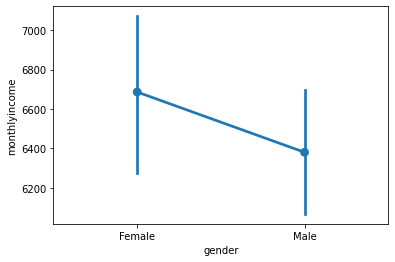

In [ ]:
import seaborn as sns

ax = sns.pointplot(x="gender", y="monthlyincome", data=df, style="darkgrid") 